# Google Merchandise Store Problem


### Understanding the problem

The attached dataset contains website users data (Google Analytics data) from Jan 1, 2017 to Jul 31, 
2017.

The sample dataset contains obfuscated Google Analytics 360 data from the Google Merchandise 
Store, a real ecommerce store. The Google Merchandise Store sells Google branded merchandise. 
The data is typical of what you would see for an ecommerce website. It includes the following kinds 
of information:

Traffic source data: information about where website visitors originate. This includes data about 
organic traffic, paid search traffic, display traffic, etc.

Content data: information about the behavior of users on the site. 

Transactional data: information about the transactions that occur on the Google Merchandise Store 
website.

Fields:

FullVisitorId: The unique visitor ID

VisitNumber: The session(visit) number for this user. If this is the first session, then this is set to 1.

Date: The date of the session in YYYYMMDD format.

VisitStartTime: The timestamp (expressed as POSIX time)

totals_bounces: Total bounces (for convenience). For a bounced session, the value is 1, otherwise it is null

totals_pageviews: Total number of pageviews within the session.

totals_timeOnSite: Total time of the session expressed in seconds.

totals_totalTransactionRevenue: Total transaction revenue, expressed as the value passed to Analytics 
multiplied by 10^6 (e.g., 2.40 would be given as 2400000)

totals_transactions: Total number of ecommerce transactions within the session

trafficSource_source: The source of the traffic source. Could be the name of the search engine, the referring 
hostname, or a value of the utm_source URL parameter

trafficSource_medium: The medium of the traffic source. Could be "organic", "cpc", "referral", or the value of 
the utm_medium URL parameter.

trafficSource_campaign: The campaign value. Usually set by the utm_campaign URL parameter
device_deviceCategory: The type of device (Mobile, Tablet, Desktop).

device_operatingSystem: The operating system of the device (e.g., "Macintosh" or "Windows").device_mobileDeviceModel: The mobile device model.

geoNetwork_city: Users' city, derived from their IP addresses or Geographical IDs.

ChannelGrouping: The Default Channel Group associated with an end user's session for this View

##### We have to build a decision tree prediction model to predict if the new visitor will transact or not. When the new visitor visits the website, we get the information about source, medium, campaign,  deviceCategory, operatingSystem, city, channelGrouping, pageviews, timeOnSite, bounce, etc.

#### Steps for solving the problem.
- Reading the Data
- Data cleaning and treatment
- EDA
- Data preperation
- Visualisation of the decision tree

In [56]:
# Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

####  1. Reading the data set

In [57]:
df=pd.read_csv("C:\\Users\\pawan\\Desktop\\merkle\\sample_user_data.csv")
df.head()

,fullVisitorId,VisitNumber,Date,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,mobileDeviceModel,city,ChannelGrouping
0,785078151568671210,1,20170427,1493331229,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,Mountain View,Organic Search
1,142102319075727733,1,20170427,1493316667,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
2,1015855318272495035,1,20170427,1493295075,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
3,7452646484470618802,1,20170427,1493299324,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
4,1985244892543433393,3,20170427,1493309497,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search


In [58]:
df.shape

(464439, 17)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464439 entries, 0 to 464438
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   fullVisitorId            464439 non-null  object 
 1   VisitNumber              464439 non-null  int64  
 2   Date                     464439 non-null  int64  
 3   VisitStartTime           464439 non-null  int64  
 4   bounces                  232178 non-null  float64
 5   pageviews                464387 non-null  float64
 6   timeOnSite               231612 non-null  float64
 7   totalTransactionRevenue  6308 non-null    float64
 8   transactions             6308 non-null    float64
 9   source                   464439 non-null  object 
 10  medium                   464439 non-null  object 
 11  campaign                 464439 non-null  object 
 12  deviceCategory           464439 non-null  object 
 13  operatingSystem          464439 non-null  object 
 14  mobi

#### 2.Data cleaning and treatment

In [60]:
# First we will need to convert "VisitStartTime" from int64 type to date and time format
df['VisitStartTime'] = pd.to_datetime(df['VisitStartTime'],unit='s')

In [61]:
df.head()

,fullVisitorId,VisitNumber,Date,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,mobileDeviceModel,city,ChannelGrouping
0,785078151568671210,1,20170427,2017-04-27 22:13:49,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,Mountain View,Organic Search
1,142102319075727733,1,20170427,2017-04-27 18:11:07,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
2,1015855318272495035,1,20170427,2017-04-27 12:11:15,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
3,7452646484470618802,1,20170427,2017-04-27 13:22:04,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
4,1985244892543433393,3,20170427,2017-04-27 16:11:37,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search


In [62]:
# checking the missing values percentage in each columns
df.isnull().sum()/len(df)*100

fullVisitorId               0.000000
VisitNumber                 0.000000
Date                        0.000000
VisitStartTime              0.000000
bounces                    50.008936
pageviews                   0.011196
timeOnSite                 50.130803
totalTransactionRevenue    98.641802
transactions               98.641802
source                      0.000000
medium                      0.000000
campaign                    0.000000
deviceCategory              0.000000
operatingSystem             0.000000
mobileDeviceModel           0.000000
city                        0.000000
ChannelGrouping             0.000000
dtype: float64

In [63]:
# extracting year, month, day, hour, minute from date
df['year'] = df['VisitStartTime'].dt.year
df['month'] = df['VisitStartTime'].dt.month
df['day'] = df['VisitStartTime'].dt.day
df['hour'] = df['VisitStartTime'].dt.hour
df['minute'] = df['VisitStartTime'].dt.minute

In [64]:
df.head()

,fullVisitorId,VisitNumber,Date,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,...,deviceCategory,operatingSystem,mobileDeviceModel,city,ChannelGrouping,year,month,day,hour,minute
0,785078151568671210,1,20170427,2017-04-27 22:13:49,1.0,1.0,NaN,NaN,NaN,google,...,desktop,Macintosh,not available in demo dataset,Mountain View,Organic Search,2017,4,27,22,13
1,142102319075727733,1,20170427,2017-04-27 18:11:07,1.0,1.0,NaN,NaN,NaN,google,...,desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search,2017,4,27,18,11
2,1015855318272495035,1,20170427,2017-04-27 12:11:15,1.0,1.0,NaN,NaN,NaN,google,...,desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search,2017,4,27,12,11
3,7452646484470618802,1,20170427,2017-04-27 13:22:04,1.0,1.0,NaN,NaN,NaN,google,...,desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search,2017,4,27,13,22
4,1985244892543433393,3,20170427,2017-04-27 16:11:37,1.0,1.0,NaN,NaN,NaN,google,...,desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search,2017,4,27,16,11


In [65]:
# Now we will be dropping visitorid, date and device model which are required in the modeling process
df = df.drop(['fullVisitorId', 'Date', 'mobileDeviceModel','VisitStartTime'], axis=1)
df.head()

,VisitNumber,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,city,ChannelGrouping,year,month,day,hour,minute
0,1,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,Mountain View,Organic Search,2017,4,27,22,13
1,1,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,Organic Search,2017,4,27,18,11
2,1,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,Organic Search,2017,4,27,12,11
3,1,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,Organic Search,2017,4,27,13,22
4,3,1.0,1.0,NaN,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,Organic Search,2017,4,27,16,11


In [66]:
# if total_bounces = 1, then no transaction; else a transaction is made, so we replace NaN with 0
df['bounces'].fillna(0, inplace=True)

# if totals_pageviews = NaN, there will be no transaction; else transaction is made, so we replace NaN with 0
df['pageviews'].fillna(0, inplace=True)

# if totals_timeOnSite = NaN,there will be no transaction; else transaction is made, so we replace NaN with 0
df['timeOnSite'].fillna(0, inplace=True)

In [67]:
df.head()

,VisitNumber,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,city,ChannelGrouping,year,month,day,hour,minute
0,1,1.0,1.0,0.0,NaN,NaN,google,organic,(not set),desktop,Macintosh,Mountain View,Organic Search,2017,4,27,22,13
1,1,1.0,1.0,0.0,NaN,NaN,google,organic,(not set),desktop,Macintosh,not available in demo dataset,Organic Search,2017,4,27,18,11
2,1,1.0,1.0,0.0,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,Organic Search,2017,4,27,12,11
3,1,1.0,1.0,0.0,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,Organic Search,2017,4,27,13,22
4,3,1.0,1.0,0.0,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,Organic Search,2017,4,27,16,11


In [68]:
df['campaign'].value_counts()

(not set)                             446332
Data Share Promo                        9708
AW - Accessories                        5318
AW - Dynamic Search Ads Whole Site      3045
AW - Apparel                              32
AW - Electronics                           3
Data Share                                 1
Name: campaign, dtype: int64

In [69]:
df['city'].value_counts()

not available in demo dataset    268179
Mountain View                     21560
(not set)                         16313
New York                          14582
San Francisco                     11455
                                  ...  
Kumamoto                              5
Boise                                 3
Bozeman                               3
Pryor                                 3
Saratoga                              3
Name: city, Length: 436, dtype: int64

In [70]:
# replacing "(not set)" by "Unavailable" in the column named campaign.
df['campaign'].replace('(not set)', 'Unavailable', inplace=True)

In [71]:
# replacing "not available in demo dataset" and "(not set)" by "Unavailable"
df['city'].replace('not available in demo dataset', 'Unavailable', inplace=True)
df['city'].replace('(not set)', 'Unavailable', inplace=True)

In [72]:
df.head()


,VisitNumber,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,city,ChannelGrouping,year,month,day,hour,minute
0,1,1.0,1.0,0.0,NaN,NaN,google,organic,Unavailable,desktop,Macintosh,Mountain View,Organic Search,2017,4,27,22,13
1,1,1.0,1.0,0.0,NaN,NaN,google,organic,Unavailable,desktop,Macintosh,Unavailable,Organic Search,2017,4,27,18,11
2,1,1.0,1.0,0.0,NaN,NaN,google,organic,Unavailable,desktop,Windows,Unavailable,Organic Search,2017,4,27,12,11
3,1,1.0,1.0,0.0,NaN,NaN,google,organic,Unavailable,desktop,Windows,Unavailable,Organic Search,2017,4,27,13,22
4,3,1.0,1.0,0.0,NaN,NaN,google,organic,Unavailable,desktop,Windows,Unavailable,Organic Search,2017,4,27,16,11


In [73]:
df['campaign'].value_counts()

Unavailable                           446332
Data Share Promo                        9708
AW - Accessories                        5318
AW - Dynamic Search Ads Whole Site      3045
AW - Apparel                              32
AW - Electronics                           3
Data Share                                 1
Name: campaign, dtype: int64

In [74]:
df['city'].value_counts()

Unavailable      284492
Mountain View     21560
New York          14582
San Francisco     11455
Sunnyvale          7588
                  ...  
Bothell               5
Saratoga              3
Pryor                 3
Bozeman               3
Boise                 3
Name: city, Length: 435, dtype: int64

#### Here we note that 'totals_totalTransactionRevenue' and 'totals_transactions' are related columns. If 'totals_transactions' has null value, then the corresponding 'totals_totalTransactionRevenue' column should also have a null value, and vice-versa.

#### We therefore check these two columns for the following conditions:

If there are any 'totals_transactions' null values where the corresponding 'totals_totalTransactionRevenue' value is not null.

If there are any 'totals_totalTransactionRevenue' null values where the corresponding 'totals_transactions' value is not null.

In [75]:
df['diff'] = df.totalTransactionRevenue.eq(pd.to_numeric(df.transactions, errors='coerce'))

In [76]:
df['diff'].value_counts()

False    464439
Name: diff, dtype: int64

#### If a user has no transaction revenue, there will be no transaction. We replace all NaN values in this column with 0

In [77]:
df['totalTransactionRevenue'].fillna(0,inplace=True)
df.head()

,VisitNumber,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,city,ChannelGrouping,year,month,day,hour,minute,diff
0,1,1.0,1.0,0.0,0.0,NaN,google,organic,Unavailable,desktop,Macintosh,Mountain View,Organic Search,2017,4,27,22,13,False
1,1,1.0,1.0,0.0,0.0,NaN,google,organic,Unavailable,desktop,Macintosh,Unavailable,Organic Search,2017,4,27,18,11,False
2,1,1.0,1.0,0.0,0.0,NaN,google,organic,Unavailable,desktop,Windows,Unavailable,Organic Search,2017,4,27,12,11,False
3,1,1.0,1.0,0.0,0.0,NaN,google,organic,Unavailable,desktop,Windows,Unavailable,Organic Search,2017,4,27,13,22,False
4,3,1.0,1.0,0.0,0.0,NaN,google,organic,Unavailable,desktop,Windows,Unavailable,Organic Search,2017,4,27,16,11,False


In [78]:
df['transactions'].fillna(0,inplace=True)
df.head()

,VisitNumber,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,city,ChannelGrouping,year,month,day,hour,minute,diff
0,1,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Macintosh,Mountain View,Organic Search,2017,4,27,22,13,False
1,1,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Macintosh,Unavailable,Organic Search,2017,4,27,18,11,False
2,1,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Windows,Unavailable,Organic Search,2017,4,27,12,11,False
3,1,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Windows,Unavailable,Organic Search,2017,4,27,13,22,False
4,3,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Windows,Unavailable,Organic Search,2017,4,27,16,11,False


In [79]:
# replacing "(not set)" by "Unavailable" in the column named source.
df['source'].replace('(not set)', 'Unavailable', inplace=True)

In [80]:
df.head()

,VisitNumber,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,city,ChannelGrouping,year,month,day,hour,minute,diff
0,1,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Macintosh,Mountain View,Organic Search,2017,4,27,22,13,False
1,1,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Macintosh,Unavailable,Organic Search,2017,4,27,18,11,False
2,1,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Windows,Unavailable,Organic Search,2017,4,27,12,11,False
3,1,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Windows,Unavailable,Organic Search,2017,4,27,13,22,False
4,3,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Windows,Unavailable,Organic Search,2017,4,27,16,11,False


In [81]:
# replacing "(not set)" by "Unavailable" in the column named operatingSystem.
df['operatingSystem'].replace('(not set)', 'Unavailable', inplace=True)
df.head()

,VisitNumber,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,city,ChannelGrouping,year,month,day,hour,minute,diff
0,1,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Macintosh,Mountain View,Organic Search,2017,4,27,22,13,False
1,1,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Macintosh,Unavailable,Organic Search,2017,4,27,18,11,False
2,1,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Windows,Unavailable,Organic Search,2017,4,27,12,11,False
3,1,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Windows,Unavailable,Organic Search,2017,4,27,13,22,False
4,3,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Windows,Unavailable,Organic Search,2017,4,27,16,11,False


In [82]:
# replacing "(not set)" by "Unavailable" in the column named medium.
df['medium'].replace('(not set)', 'Unavailable', inplace=True)
df.head()

,VisitNumber,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,city,ChannelGrouping,year,month,day,hour,minute,diff
0,1,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Macintosh,Mountain View,Organic Search,2017,4,27,22,13,False
1,1,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Macintosh,Unavailable,Organic Search,2017,4,27,18,11,False
2,1,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Windows,Unavailable,Organic Search,2017,4,27,12,11,False
3,1,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Windows,Unavailable,Organic Search,2017,4,27,13,22,False
4,3,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Windows,Unavailable,Organic Search,2017,4,27,16,11,False


In [83]:
# checking the missing values percentage in each columns 
df.isnull().sum()/len(df)*100

VisitNumber                0.0
bounces                    0.0
pageviews                  0.0
timeOnSite                 0.0
totalTransactionRevenue    0.0
transactions               0.0
source                     0.0
medium                     0.0
campaign                   0.0
deviceCategory             0.0
operatingSystem            0.0
city                       0.0
ChannelGrouping            0.0
year                       0.0
month                      0.0
day                        0.0
hour                       0.0
minute                     0.0
diff                       0.0
dtype: float64

#### We further drop the following columns from the dataset as these are no longer required:

In [84]:
df = df.drop(['year','diff'],axis=1)

#### Now our Data is clean.

#### 3. EDA

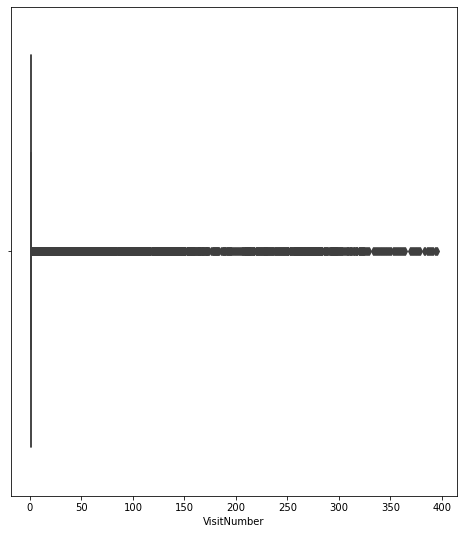

In [85]:
# plotting a boxplot to see the visit number
plt.figure(figsize=(8,9))
sns.boxplot(df['VisitNumber'])

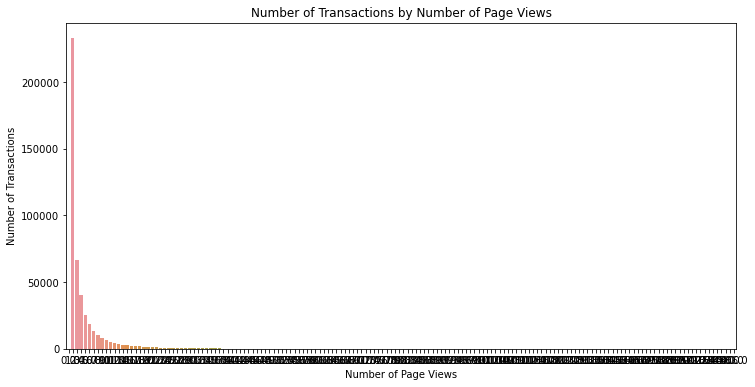

In [86]:
#plotting the pageviews.
plt.figure(figsize=(12,6))
sns.countplot(x='pageviews', data=df)
plt.xlabel('Number of Page Views')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Number of Page Views');

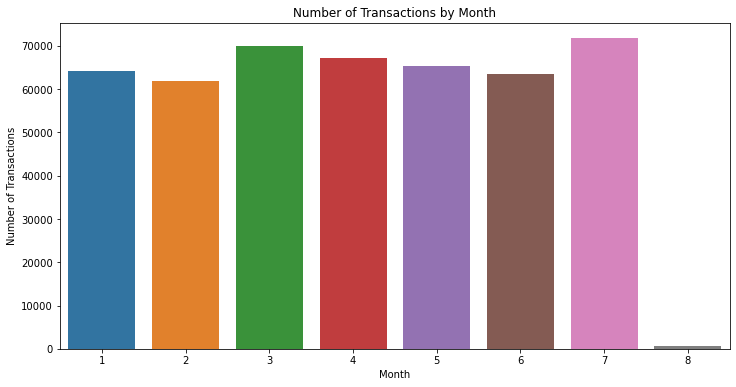

In [87]:
#Number of Transactions by Month
plt.figure(figsize=(12,6))
sns.countplot(x='month', data=df, )
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions by Month");

### As we can see here in the 8th month there is approximately 100 transactions onlywhereas the maximum transactions reaches to 70,000

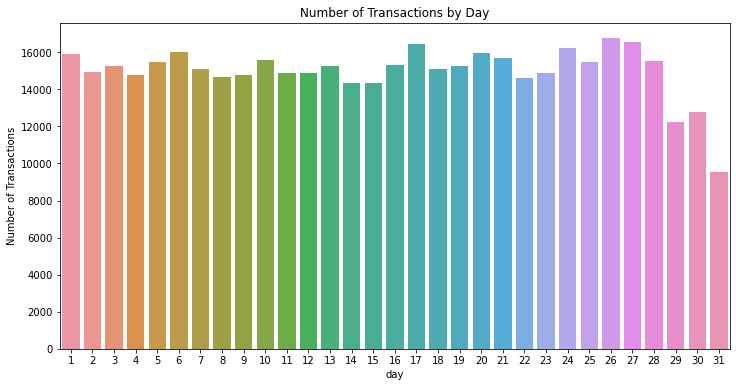

In [88]:
# Number of Transactions by Day
plt.figure(figsize=(12,6))
sns.countplot(x='day', data=df, )
plt.xlabel("day")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions by Day");

#### As we can see here in the month end there is a drop in number of transactions

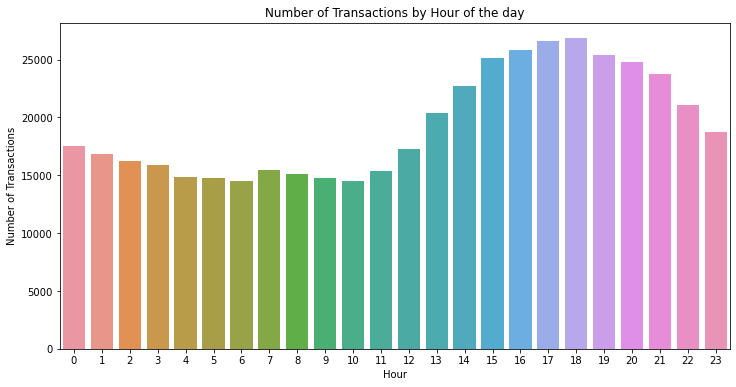

In [89]:
# Number of Transactions by Hour of the day
plt.figure(figsize=(12,6))
sns.countplot(x='hour', data=df,)
plt.xlabel("Hour")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions by Hour of the day");

As we can see in the Number of Transactions by Hour of the day the transactions increase by the end of the day

#### Transactions by device category, channelGrouping, medium

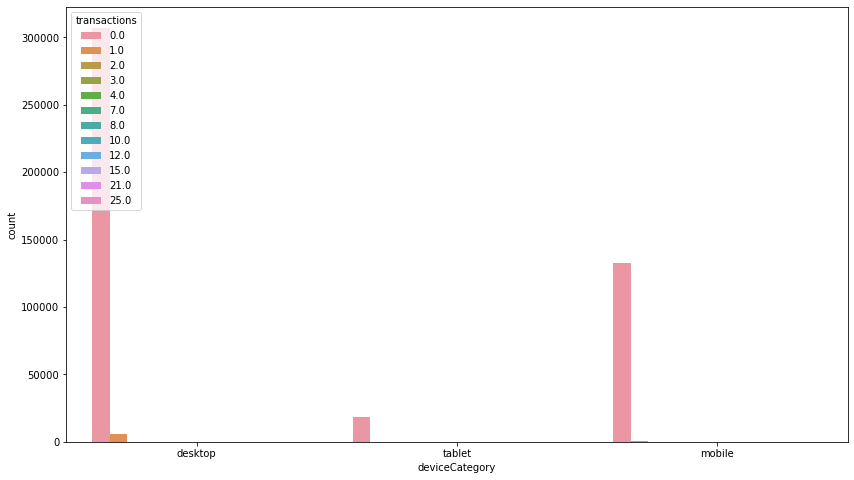

In [90]:

plt.figure(figsize=(14,8))
sns.countplot(x='deviceCategory', hue = 'transactions', data=df);

##### Maximum transactions have been placed through a desktop

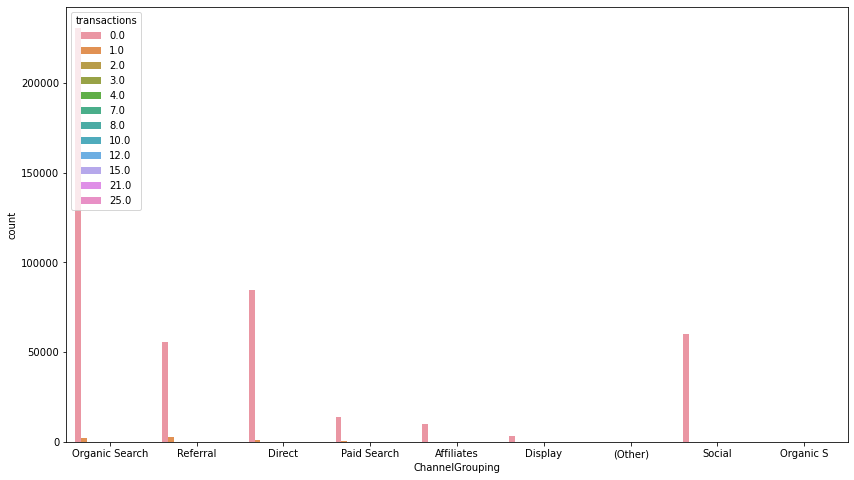

In [91]:
plt.figure(figsize=(14,8))
sns.countplot(x='ChannelGrouping', hue = 'transactions', data=df);

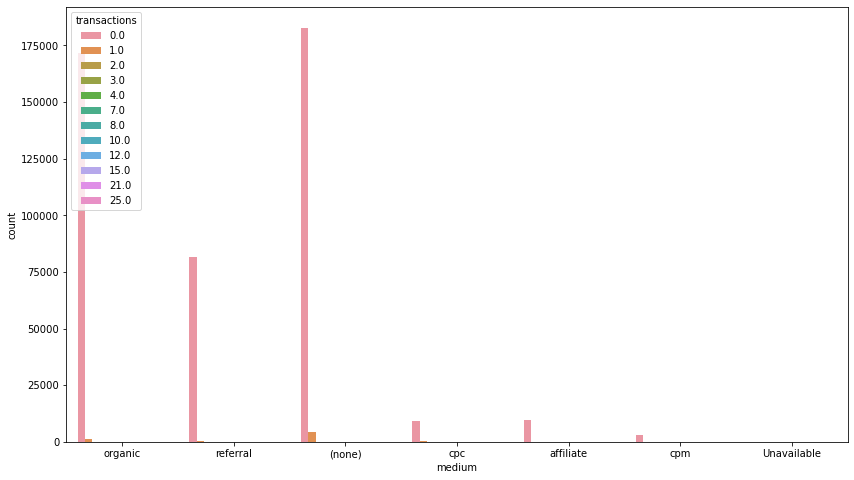

In [92]:

plt.figure(figsize=(14,8))
sns.countplot(x='medium', hue = 'transactions', data=df);

#### Correlation Matrix showing relationship between all the features

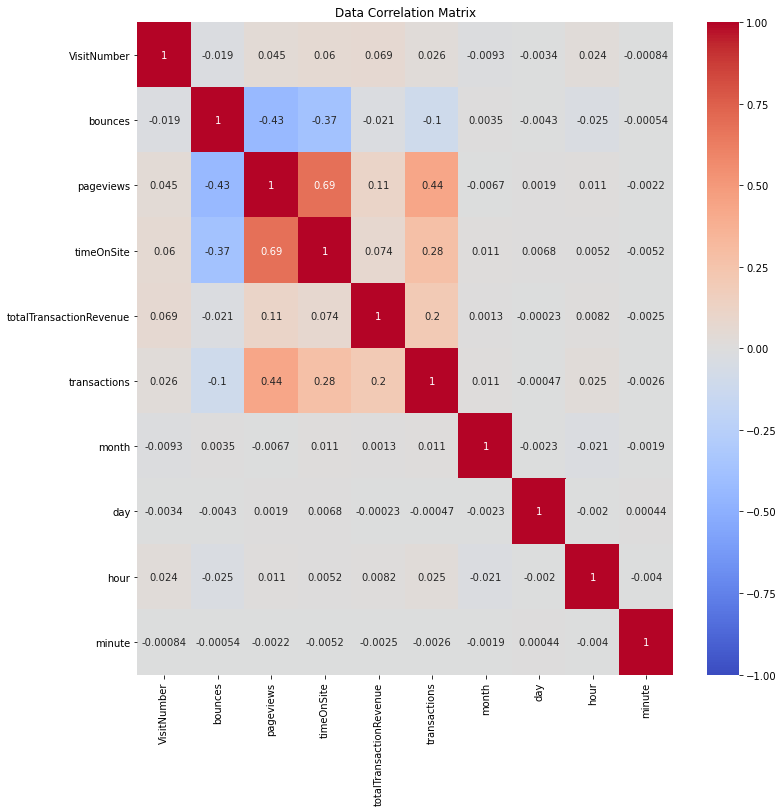

In [93]:

fig1 = plt.figure(figsize=(12,12));
df.corr()
plt.title('Data Correlation Matrix')
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = 'coolwarm', annot=True);

#### 4. Data preperation

In [94]:
df.columns

Index(['VisitNumber', 'bounces', 'pageviews', 'timeOnSite',
       'totalTransactionRevenue', 'transactions', 'source', 'medium',
       'campaign', 'deviceCategory', 'operatingSystem', 'city',
       'ChannelGrouping', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [95]:
df.head()

,VisitNumber,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,city,ChannelGrouping,month,day,hour,minute
0,1,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Macintosh,Mountain View,Organic Search,4,27,22,13
1,1,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Macintosh,Unavailable,Organic Search,4,27,18,11
2,1,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Windows,Unavailable,Organic Search,4,27,12,11
3,1,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Windows,Unavailable,Organic Search,4,27,13,22
4,3,1.0,1.0,0.0,0.0,0.0,google,organic,Unavailable,desktop,Windows,Unavailable,Organic Search,4,27,16,11


In [96]:
dum_cols=['source','medium','campaign','deviceCategory','operatingSystem','city','ChannelGrouping']
dum_cols

['source',
 'medium',
 'campaign',
 'deviceCategory',
 'operatingSystem',
 'city',
 'ChannelGrouping']

In [97]:
df_dum= pd.get_dummies(df[dum_cols], drop_first=True)
df_dum

,source_9to5google.com,source_Partners,source_Unavailable,source_ad.doubleclick.net,source_admin.globalaccess.com,source_adwords.google.com,source_amazon.com,source_amp.reddit.com,source_analytics.google.com,source_aol,...,city_Zhudong Township,city_Zurich,ChannelGrouping_Affiliates,ChannelGrouping_Direct,ChannelGrouping_Display,ChannelGrouping_Organic S,ChannelGrouping_Organic Search,ChannelGrouping_Paid Search,ChannelGrouping_Referral,ChannelGrouping_Social
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
464435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
464436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
464437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [98]:
df = pd.concat([df, df_dum],axis=1)
df.drop(dum_cols, axis=1, inplace=True)
df.shape

(464439, 705)

In [99]:
df.head()

,VisitNumber,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,month,day,hour,minute,...,city_Zhudong Township,city_Zurich,ChannelGrouping_Affiliates,ChannelGrouping_Direct,ChannelGrouping_Display,ChannelGrouping_Organic S,ChannelGrouping_Organic Search,ChannelGrouping_Paid Search,ChannelGrouping_Referral,ChannelGrouping_Social
0,1,1.0,1.0,0.0,0.0,0.0,4,27,22,13,...,0,0,0,0,0,0,1,0,0,0
1,1,1.0,1.0,0.0,0.0,0.0,4,27,18,11,...,0,0,0,0,0,0,1,0,0,0
2,1,1.0,1.0,0.0,0.0,0.0,4,27,12,11,...,0,0,0,0,0,0,1,0,0,0
3,1,1.0,1.0,0.0,0.0,0.0,4,27,13,22,...,0,0,0,0,0,0,1,0,0,0
4,3,1.0,1.0,0.0,0.0,0.0,4,27,16,11,...,0,0,0,0,0,0,1,0,0,0


#### Train test split

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
# Putting feature variable to X
X = df.drop('transactions',axis=1)

# Putting response variable to y
y = df['transactions']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((325107, 704), (139332, 704))

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [105]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [106]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

#### Evaluating on the test data

In [111]:
print ('Accuracy: ', accuracy_score(y_test, y_test_pred))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred))

Accuracy:  0.9996267906869922

 clasification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    137458
         1.0       0.98      1.00      0.99      1827
         2.0       0.12      0.02      0.04        41
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         3
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         1

    accuracy                           1.00    139332
   macro avg       0.30      0.29      0.29    139332
weighted avg       1.00      1.00      1.00    139332


 confussion matrix:
 [[137458      0      0      0      0      0      0]
 [     0   1821      6      0      0      0      0]
 [     0     40      1      0      0      0      0]
 [     0      1      1      0      0      0      0]
 [     0      3      0      0      0      0      0]
 [     0      0      0      0      0      0      0]
 [     0      

### 5.Visualising the decision tree

In [121]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/bin/'

In [124]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

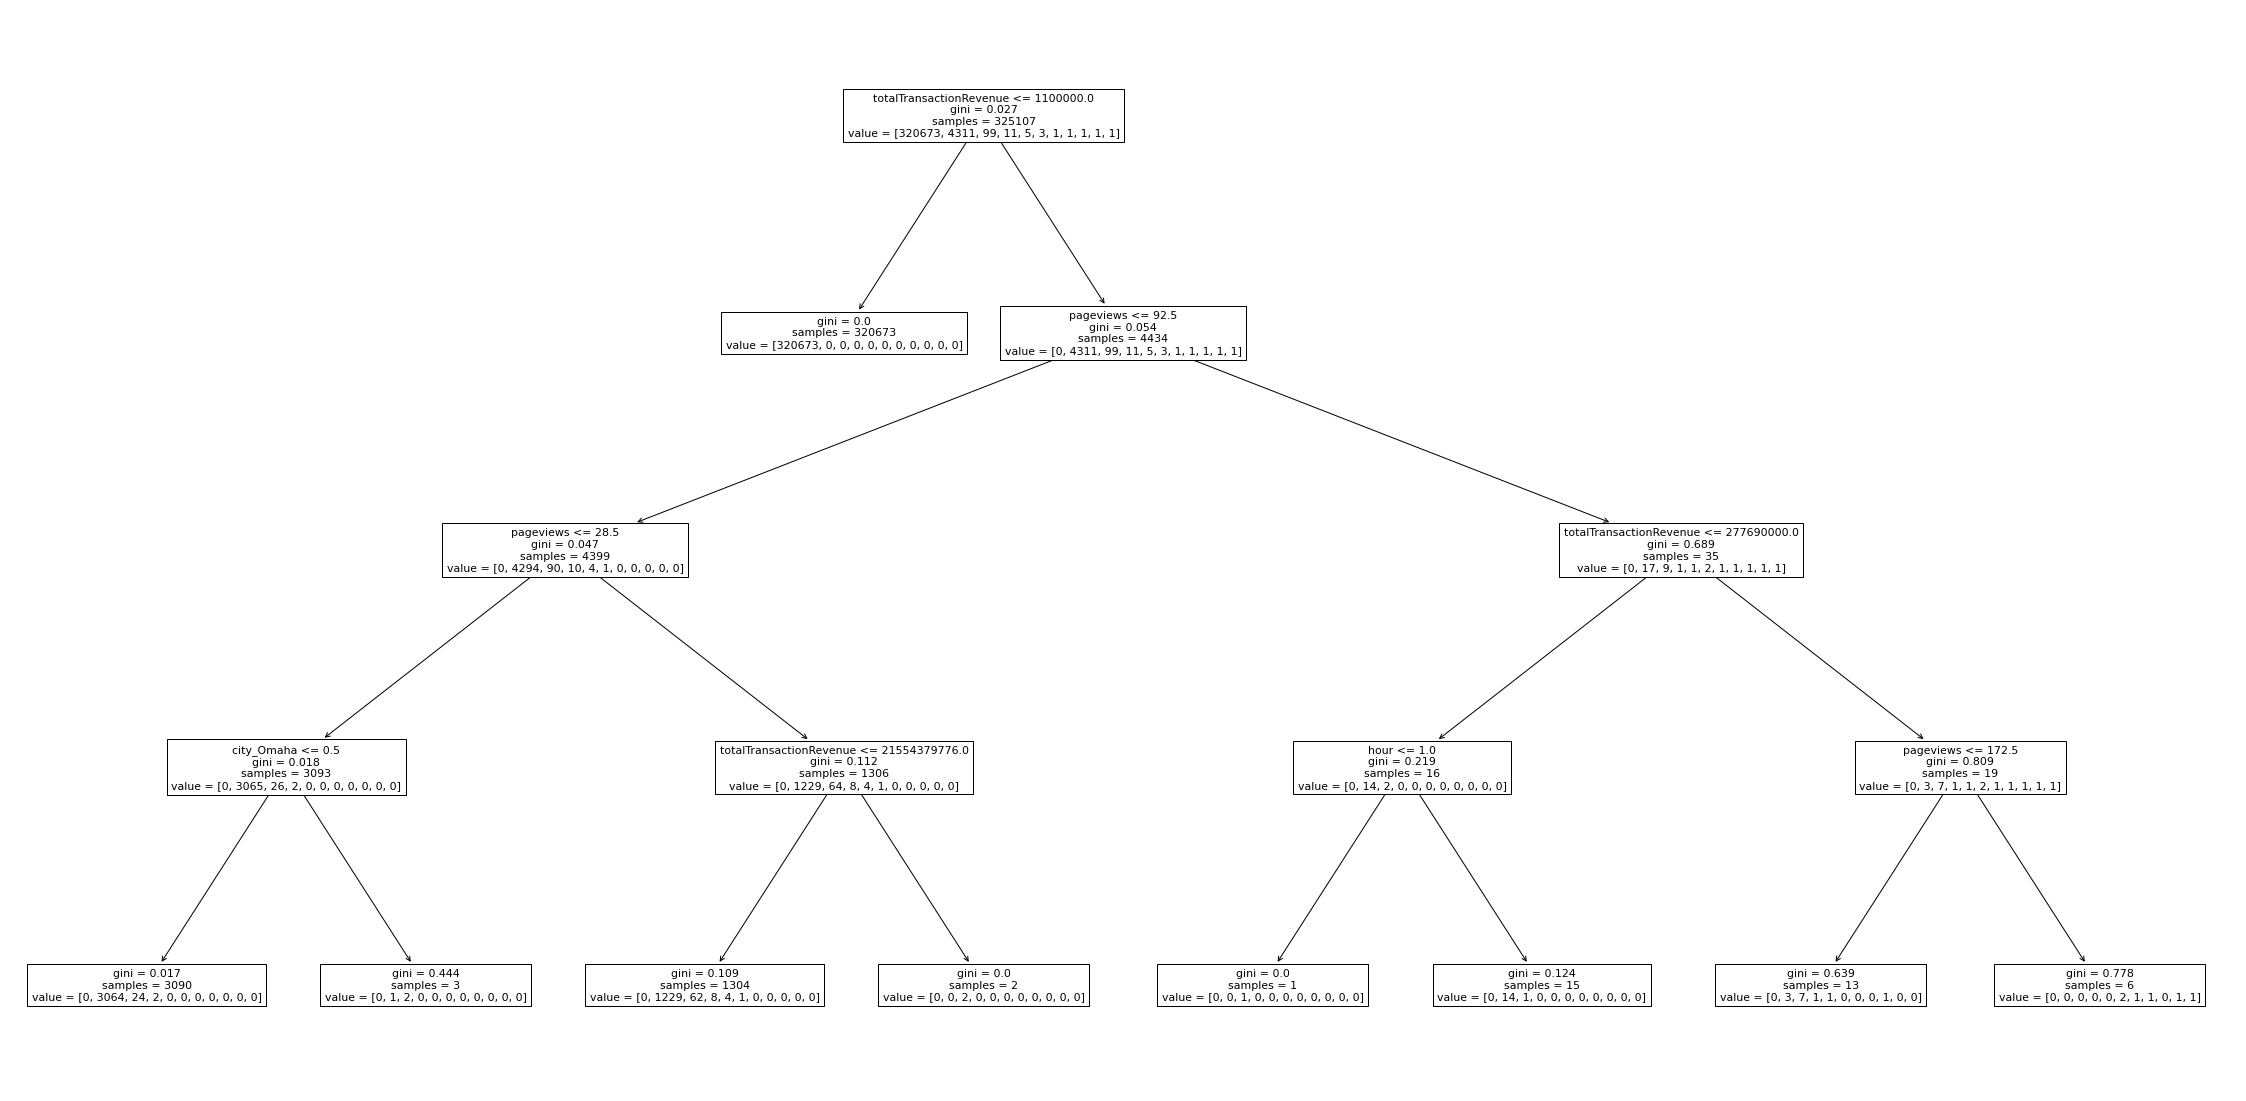

In [130]:
from sklearn import tree
plt.figure(figsize=(40,20))  # customize according to the size of the tree
_ = tree.plot_tree(dt_base, feature_names = X.columns)
plt.show()

Double click on the figure above to expand